In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [128]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [186]:
df=pd.read_csv('/content/drive/MyDrive/DS_DataSet/Bullying_2018.csv', sep=r';') 

df.head()

,record,Bullied_on_school_property_in_past_12_months,Bullied_not_on_school_property_in_past_12_months,Cyber_bullied_in_past_12_months,Custom_Age,Sex,Physically_attacked,Physical_fighting,Felt_lonely,Close_friends,Miss_school_no_permission,Other_students_kind_and_helpful,Parents_understand_problems,Most_of_the_time_or_always_felt_lonely,Missed_classes_or_school_without_permission,Were_underweight,Were_overweight,Were_obese
0,1,Yes,Yes,,13 years old,Female,0 times,0 times,Always,2,10 or more days,Never,Always,Yes,Yes,,,
1,2,No,No,No,13 years old,Female,0 times,0 times,Never,3 or more,0 days,Sometimes,Always,No,No,,,
2,3,No,No,No,14 years old,Male,0 times,0 times,Never,3 or more,0 days,Sometimes,Always,No,No,No,No,No
3,4,No,No,No,16 years old,Male,0 times,2 or 3 times,Never,3 or more,0 days,Sometimes,,No,No,No,No,No
4,5,No,No,No,13 years old,Female,0 times,0 times,Rarely,3 or more,0 days,Most of the time,Most of the time,No,No,,,


In [187]:
df.replace(r'^\s*$', np.nan, regex=True, inplace=True)

In [188]:
df.isnull().sum()

record                                                  0
Bullied_on_school_property_in_past_12_months         1239
Bullied_not_on_school_property_in_past_12_months      489
Cyber_bullied_in_past_12_months                       571
Custom_Age                                            108
Sex                                                   536
Physically_attacked                                   240
Physical_fighting                                     268
Felt_lonely                                           366
Close_friends                                        1076
Miss_school_no_permission                            1864
Other_students_kind_and_helpful                      1559
Parents_understand_problems                          2373
Most_of_the_time_or_always_felt_lonely                366
Missed_classes_or_school_without_permission          1864
Were_underweight                                    20929
Were_overweight                                     20929
Were_obese    

## Preprocessing

In [189]:
df=df[["Bullied_on_school_property_in_past_12_months", "Bullied_not_on_school_property_in_past_12_months","Cyber_bullied_in_past_12_months","Miss_school_no_permission","Close_friends","Sex","Felt_lonely","Missed_classes_or_school_without_permission","Most_of_the_time_or_always_felt_lonely"]]

In [190]:
df.isnull().sum()

Bullied_on_school_property_in_past_12_months        1239
Bullied_not_on_school_property_in_past_12_months     489
Cyber_bullied_in_past_12_months                      571
Miss_school_no_permission                           1864
Close_friends                                       1076
Sex                                                  536
Felt_lonely                                          366
Missed_classes_or_school_without_permission         1864
Most_of_the_time_or_always_felt_lonely               366
dtype: int64

In [191]:
df.head()

,Bullied_on_school_property_in_past_12_months,Bullied_not_on_school_property_in_past_12_months,Cyber_bullied_in_past_12_months,Miss_school_no_permission,Close_friends,Sex,Felt_lonely,Missed_classes_or_school_without_permission,Most_of_the_time_or_always_felt_lonely
0,Yes,Yes,NaN,10 or more days,2,Female,Always,Yes,Yes
1,No,No,No,0 days,3 or more,Female,Never,No,No
2,No,No,No,0 days,3 or more,Male,Never,No,No
3,No,No,No,0 days,3 or more,Male,Never,No,No
4,No,No,No,0 days,3 or more,Female,Rarely,No,No


In [200]:


df = df.replace({'Bullied_on_school_property_in_past_12_months': {'Yes': 1, 'No': 0}})
df = df.replace({'Bullied_not_on_school_property_in_past_12_months': {'Yes': 1, 'No': 0}})
df = df.replace({'Cyber_bullied_in_past_12_months': {'Yes': 1, 'No': 0}})
df = df.replace({'Missed_classes_or_school_without_permission': {'Yes': 1, 'No': 0}})
df = df.replace({'Most_of_the_time_or_always_felt_lonely': {'Yes': 1, 'No': 0}})
df = df.replace({'Felt_lonely': {'Never': 0,'Rarely':1,'Sometimes': 2,'Always': 3, 'Most of the time': 4}})

df['Bullied_on_school_property_in_past_12_months'] = df['Bullied_on_school_property_in_past_12_months'].fillna(df['Bullied_on_school_property_in_past_12_months'].mode())
df['Bullied_not_on_school_property_in_past_12_months'] = df['Bullied_not_on_school_property_in_past_12_months'].fillna(df['Bullied_not_on_school_property_in_past_12_months'].mode())
df['Cyber_bullied_in_past_12_months'] = df['Cyber_bullied_in_past_12_months'].fillna(df['Cyber_bullied_in_past_12_months'].mode())
df['Felt_lonely'] = df['Felt_lonely'].fillna(df['Felt_lonely'].median())
df['Sex'] = df['Sex'].fillna(df['Sex'].mode())
df['Most_of_the_time_or_always_felt_lonely'] = df['Most_of_the_time_or_always_felt_lonely'].fillna(df['Most_of_the_time_or_always_felt_lonely'].mode())

df['Miss_school_no_permission'] = df['Miss_school_no_permission'].fillna(0)
df['Close_friends'] = df['Miss_school_no_permission'].fillna(0)

values= df['Felt_lonely'].unique()
print(values)

df.head()


[3. 0. 1. 2. 4.]


,Bullied_on_school_property_in_past_12_months,Bullied_not_on_school_property_in_past_12_months,Cyber_bullied_in_past_12_months,Miss_school_no_permission,Close_friends,Sex,Felt_lonely,Missed_classes_or_school_without_permission,Most_of_the_time_or_always_felt_lonely
0,1.0,1.0,0.0,10,10,Female,3.0,1.0,1.0
1,0.0,0.0,0.0,0,0,Female,0.0,0.0,0.0
2,0.0,0.0,0.0,0,0,Male,0.0,0.0,0.0
3,0.0,0.0,0.0,0,0,Male,0.0,0.0,0.0
4,0.0,0.0,0.0,0,0,Female,1.0,0.0,0.0


## Dealing with numerical missing

In [201]:

df['Miss_school_no_permission'] = df['Miss_school_no_permission'].replace('or', ',', regex=True)
df['Miss_school_no_permission'] = df['Miss_school_no_permission'].replace('to', ',', regex=True)
df['Miss_school_no_permission'] = df['Miss_school_no_permission'].replace('[a-zA-Z ]+', '', regex=True)
df['Miss_school_no_permission'] = df['Miss_school_no_permission'].replace(',[0-9]*', '', regex=True).astype('int64')



df['Close_friends'] = df['Close_friends'].replace('or', ',', regex=True)
df['Close_friends'] = df['Close_friends'].replace('to', ',', regex=True)
df['Close_friends'] = df['Close_friends'].replace('[a-zA-Z ]+', '', regex=True)
df['Close_friends'] = df['Close_friends'].replace(',[0-9]*', '', regex=True).astype('int64')



In [202]:
df.head()

,Bullied_on_school_property_in_past_12_months,Bullied_not_on_school_property_in_past_12_months,Cyber_bullied_in_past_12_months,Miss_school_no_permission,Close_friends,Sex,Felt_lonely,Missed_classes_or_school_without_permission,Most_of_the_time_or_always_felt_lonely
0,1.0,1.0,0.0,10,10,Female,3.0,1.0,1.0
1,0.0,0.0,0.0,0,0,Female,0.0,0.0,0.0
2,0.0,0.0,0.0,0,0,Male,0.0,0.0,0.0
3,0.0,0.0,0.0,0,0,Male,0.0,0.0,0.0
4,0.0,0.0,0.0,0,0,Female,1.0,0.0,0.0


In [203]:
#df = df.replace({'Bullied_on_school_property_in_past_12_months': {'Yes': 1, 'No': 0}})
#df = df.replace({'Bullied_not_on_school_property_in_past_12_months': {'Yes': 1, 'No': 0}})
#df = df.replace({'Cyber_bullied_in_past_12_months': {'Yes': 1, 'No': 0}})
#df = df.replace({'Sex': {'Male': 1, 'Female': 0}})

#df.head(5)

## Question 3 Exploratory

## How many days does a student being bullied usually skip on average?


Text(0.5, 1.0, 'Cyber_bullied_in_past_12_months')

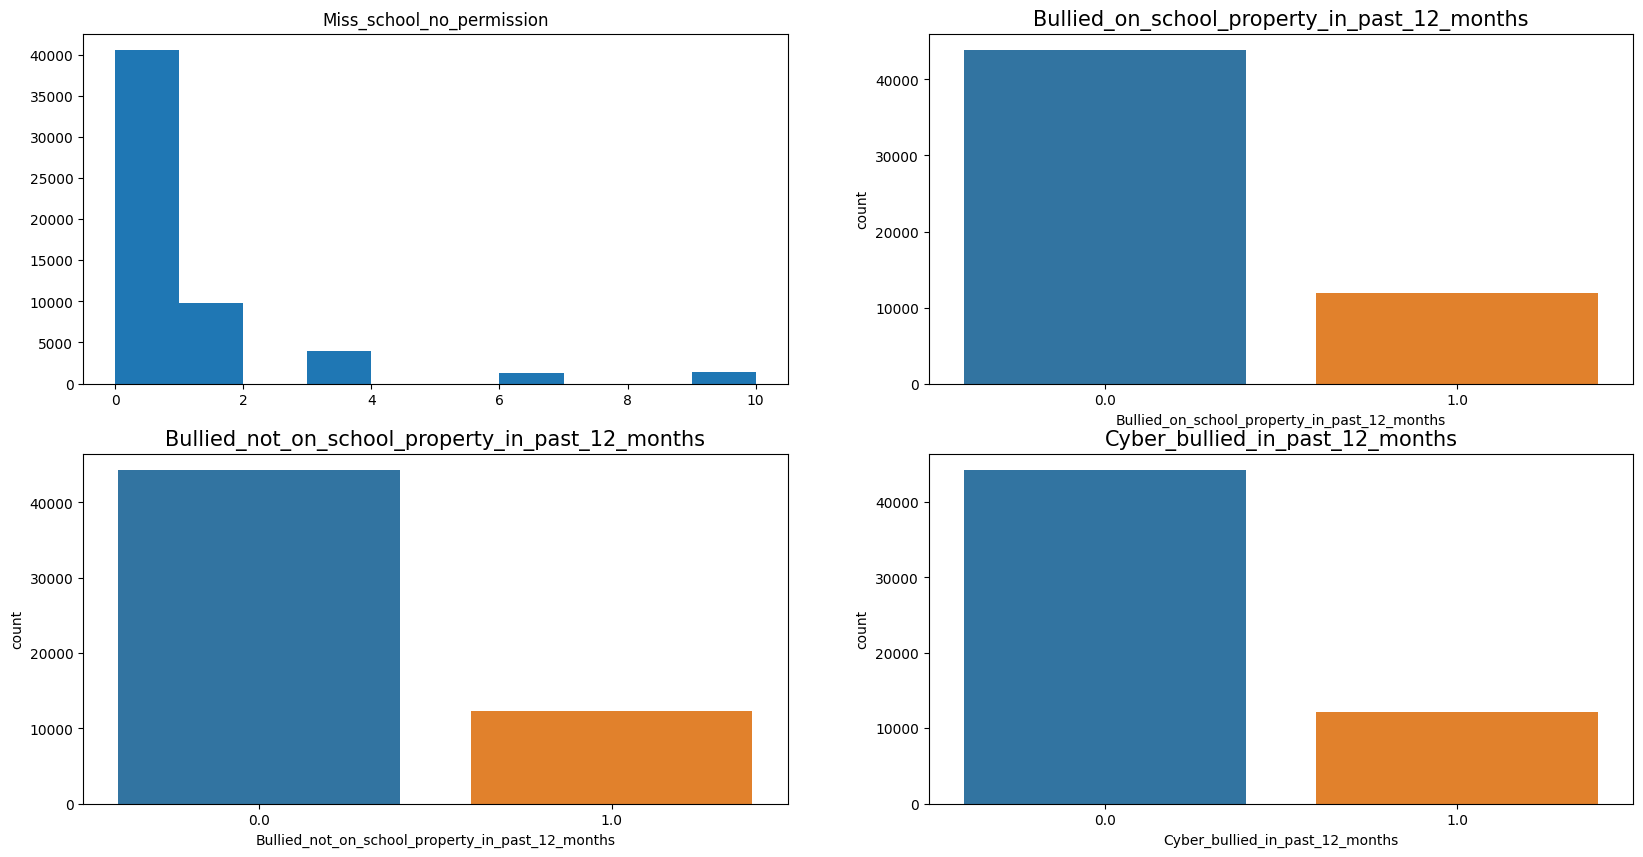

In [204]:
plt.figure(figsize=(20,10))
plt.subplot(221)
plt.hist(df['Miss_school_no_permission'])
Miss_School_mode=df['Miss_school_no_permission'].mode()
plt.title('Miss_school_no_permission')
plt.subplot(222)

sns.countplot(x='Bullied_on_school_property_in_past_12_months', data=df, order=df['Bullied_on_school_property_in_past_12_months'].value_counts().index)
plt.title('Bullied_on_school_property_in_past_12_months', fontsize=15)
plt.subplot(223)
sns.countplot(x='Bullied_not_on_school_property_in_past_12_months', data=df, order=df['Bullied_not_on_school_property_in_past_12_months'].value_counts().index)
plt.title('Bullied_not_on_school_property_in_past_12_months', fontsize=15)
plt.subplot(224)
sns.countplot(x='Cyber_bullied_in_past_12_months', data=df, order=df['Cyber_bullied_in_past_12_months'].value_counts().index)
plt.title('Cyber_bullied_in_past_12_months', fontsize=15)

#plt.hist(df['Bullied_on_school_property_in_past_12_months'])
#Miss_School_mode=df['Bullied_on_school_property_in_past_12_months'].mode()
#plt.title('Bullied_on_school_property_in_past_12_months')
#plt.subplot(223)
#plt.hist(df['Bullied_not_on_school_property_in_past_12_months'])
#Miss_School_mode=df['Bullied_not_on_school_property_in_past_12_months'].mode()
#plt.title('Bullied_not_on_school_property_in_past_12_months')
#plt.subplot(224)
#plt.hist(df['Cyber_bullied_in_past_12_months'])
#Miss_School_mode=df['Cyber_bullied_in_past_12_months'].mode()
#plt.title('Cyber_bullied_in_past_12_months')


In [205]:
df_bullying= df[["Bullied_on_school_property_in_past_12_months", "Bullied_not_on_school_property_in_past_12_months","Cyber_bullied_in_past_12_months","Miss_school_no_permission"]]
df_bullying.head()

,Bullied_on_school_property_in_past_12_months,Bullied_not_on_school_property_in_past_12_months,Cyber_bullied_in_past_12_months,Miss_school_no_permission
0,1.0,1.0,0.0,10
1,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0
3,0.0,0.0,0.0,0
4,0.0,0.0,0.0,0


In [206]:
import numpy as np
df_bullying['Bullying'] = df_bullying['Bullied_on_school_property_in_past_12_months'] + df_bullying['Bullied_not_on_school_property_in_past_12_months'] + df_bullying['Cyber_bullied_in_past_12_months']
df_bullying['Bullying'] = np.where(df_bullying['Bullying'] > 1, True, False)

final_df= df_bullying[["Bullying","Miss_school_no_permission"]]
final_df = final_df.sort_values(by=['Bullying'], ascending=False)
#final_df=final_df.drop_duplicates(subset=["Bullying_times","Miss_school_no_permission"], keep='last')
final_df.head()



<ipython-input-206-6a84d9f41c8f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bullying['Bullying'] = df_bullying['Bullied_on_school_property_in_past_12_months'] + df_bullying['Bullied_not_on_school_property_in_past_12_months'] + df_bullying['Cyber_bullied_in_past_12_months']
<ipython-input-206-6a84d9f41c8f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bullying['Bullying'] = np.where(df_bullying['Bullying'] > 1, True, False)


,Bullying,Miss_school_no_permission
0,True,10
23574,True,0
23400,True,0
23408,True,1
23410,True,0


Text(0, 0.5, 'Miss school with nopermission')

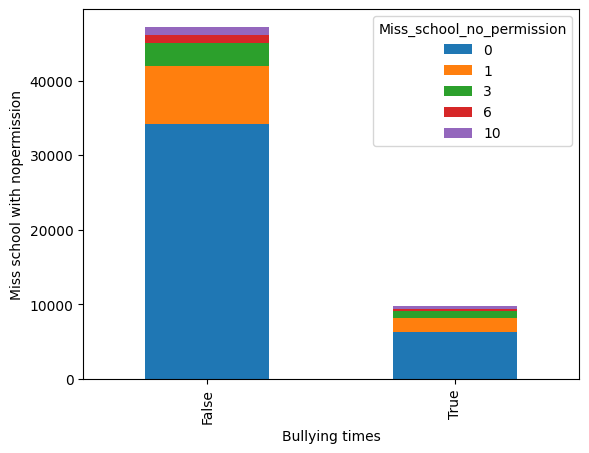

In [207]:
cross_tab = pd.crosstab(final_df['Bullying'], final_df['Miss_school_no_permission'])
 
stacked_bar = cross_tab.plot(kind='bar', stacked=True)
stacked_bar.set_xlabel('Bullying times')
stacked_bar.set_ylabel('Miss school with nopermission')

Class=2, n=9755 (17.120%)
Class=1, n=47226 (82.880%)


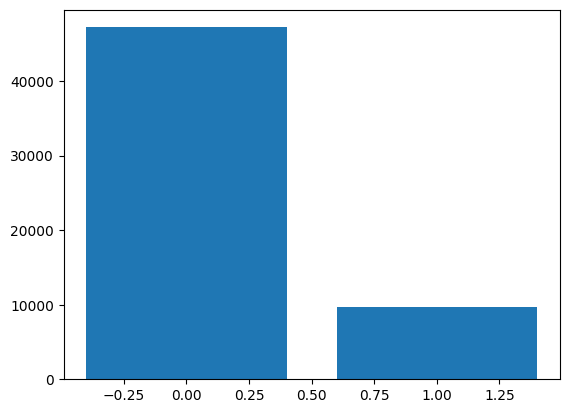

In [208]:

from collections import Counter
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
import imblearn

y = LabelEncoder().fit_transform(final_df['Bullying'])
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
 per = v / len(y) * 100
 print('Class=%d, n=%d (%.3f%%)' % (k+1, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

Class=1, n=47226 (50.000%)
Class=0, n=47226 (50.000%)


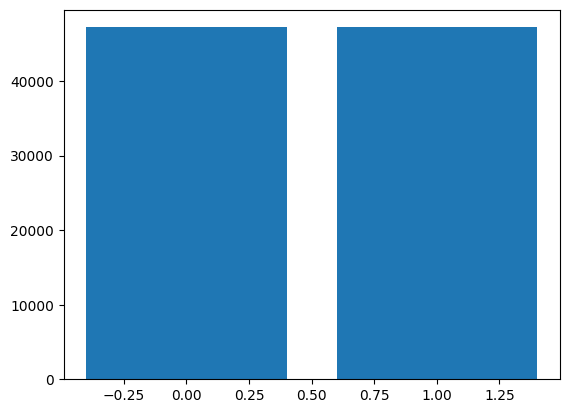

In [209]:
# Resampling

oversample = SMOTE()
y=final_df['Bullying']
X=final_df.loc[:, final_df.columns != 'Bullying']
X, y = oversample.fit_resample(X, y)
final_df = pd.concat([pd.DataFrame(X), pd.DataFrame(y)], axis=1)
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
 per = v / len(y) * 100
 print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

Text(0, 0.5, 'Miss school with nopermission')

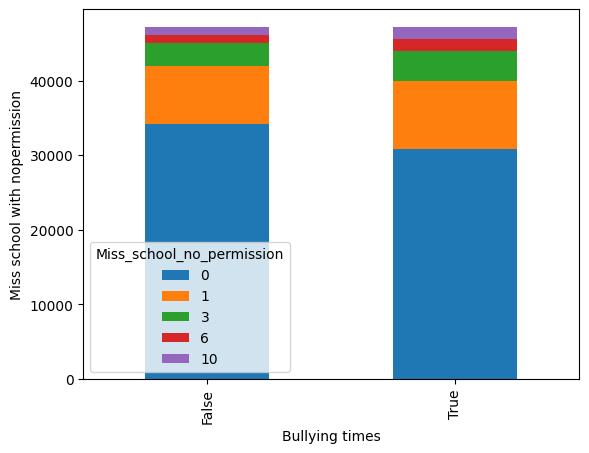

In [210]:
cross_tab = pd.crosstab(final_df['Bullying'], final_df['Miss_school_no_permission'])
 
stacked_bar = cross_tab.plot(kind='bar', stacked=True)
stacked_bar.set_xlabel('Bullying times')
stacked_bar.set_ylabel('Miss school with nopermission')

In [220]:
import math
final_df.drop_duplicates()
#bullying_values= final_df['Bullying_times'].unique()
result = np.ceil(final_df.groupby('Bullying')['Miss_school_no_permission'].mean().reset_index())
result = result.replace({'Bullying': {0.0: "Don't suffer from bullying" , 1: "suffer from bullying"}})
result

,Bullying,Miss_school_no_permission
0,Don't suffer from bullying,1.0
1,suffer from bullying,2.0


In [212]:
result = df_bullying.groupby('Bullied_on_school_property_in_past_12_months')['Miss_school_no_permission'].mean().reset_index()
result

,Bullied_on_school_property_in_past_12_months,Miss_school_no_permission
0,0.0,0.730058
1,1.0,0.900361


Text(0, 0.5, 'Miss school with nopermission')

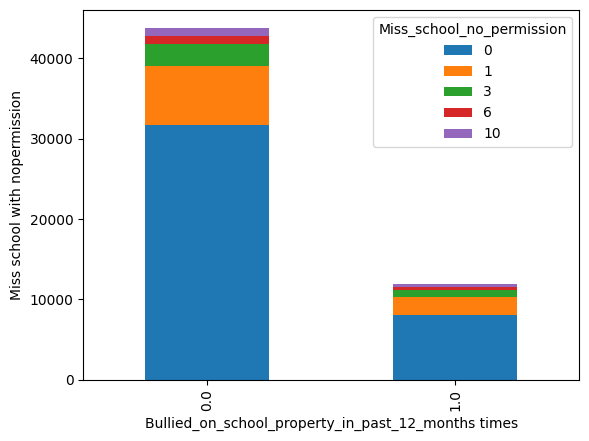

In [213]:
cross_tab = pd.crosstab(df_bullying['Bullied_on_school_property_in_past_12_months'], df_bullying['Miss_school_no_permission'])
 
stacked_bar = cross_tab.plot(kind='bar', stacked=True)
stacked_bar.set_xlabel('Bullied_on_school_property_in_past_12_months times')
stacked_bar.set_ylabel('Miss school with nopermission')

Text(0, 0.5, 'Miss school with nopermission')

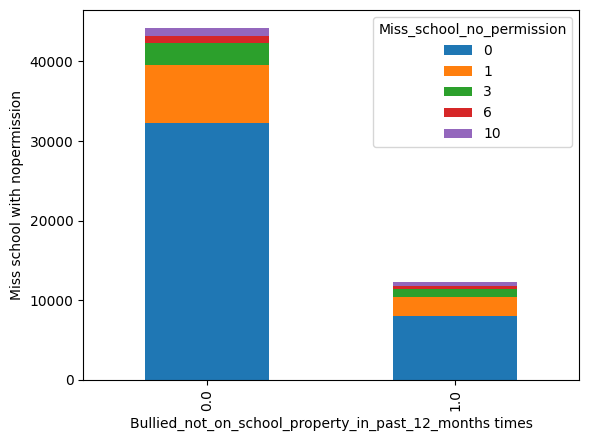

In [214]:
cross_tab = pd.crosstab(df_bullying['Bullied_not_on_school_property_in_past_12_months'], df_bullying['Miss_school_no_permission'])
 
stacked_bar = cross_tab.plot(kind='bar', stacked=True)
stacked_bar.set_xlabel('Bullied_not_on_school_property_in_past_12_months times')
stacked_bar.set_ylabel('Miss school with nopermission')

Text(0, 0.5, 'Miss school with nopermission')

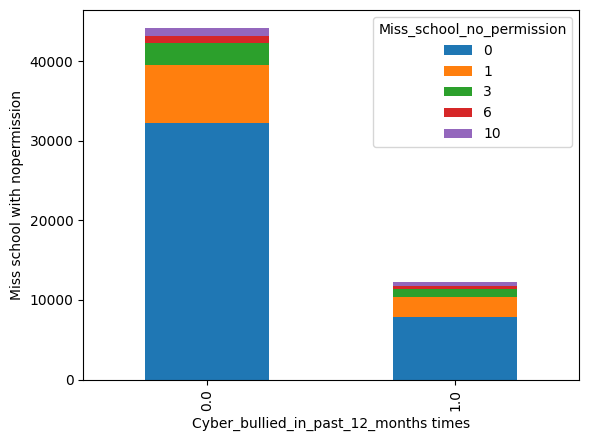

In [215]:
cross_tab = pd.crosstab(df_bullying['Cyber_bullied_in_past_12_months'], df_bullying['Miss_school_no_permission'])
 
stacked_bar = cross_tab.plot(kind='bar', stacked=True)
stacked_bar.set_xlabel('Cyber_bullied_in_past_12_months times')
stacked_bar.set_ylabel('Miss school with nopermission')

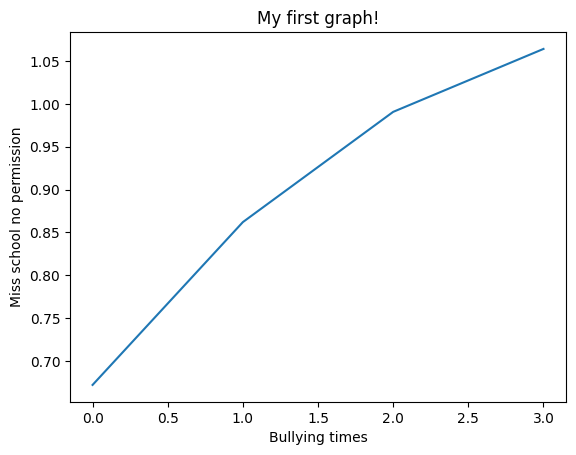

In [325]:
plt.plot(result['Bullying_times'], result['Miss_school_no_permission'])
  
# naming the x axis
plt.xlabel('Bullying times')
# naming the y axis
plt.ylabel('Miss school no permission')
  
# giving a title to my graph
plt.title('My first graph!')
  
# function to show the plot
plt.show()

## Question 8
## Does bullying differ based on gender?


---



In [318]:
df_bullying_gender= df[["Bullied_on_school_property_in_past_12_months", "Bullied_not_on_school_property_in_past_12_months","Cyber_bullied_in_past_12_months","Sex"]]
df_bullying_gender['total_Bullying_times'] = df_bullying_gender['Bullied_on_school_property_in_past_12_months'] + df_bullying_gender['Bullied_not_on_school_property_in_past_12_months'] + df_bullying_gender['Cyber_bullied_in_past_12_months']

df_bullying_gender.head()

<ipython-input-318-aa6863877b16>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bullying_gender['total_Bullying_times'] = df_bullying_gender['Bullied_on_school_property_in_past_12_months'] + df_bullying_gender['Bullied_not_on_school_property_in_past_12_months'] + df_bullying_gender['Cyber_bullied_in_past_12_months']


,Bullied_on_school_property_in_past_12_months,Bullied_not_on_school_property_in_past_12_months,Cyber_bullied_in_past_12_months,Sex,total_Bullying_times
0,1.0,1.0,0.0,Female,2.0
1,0.0,0.0,0.0,Female,0.0
2,0.0,0.0,0.0,Male,0.0
3,0.0,0.0,0.0,Male,0.0
4,0.0,0.0,0.0,Female,0.0


Text(0.5, 1.0, 'Gender')

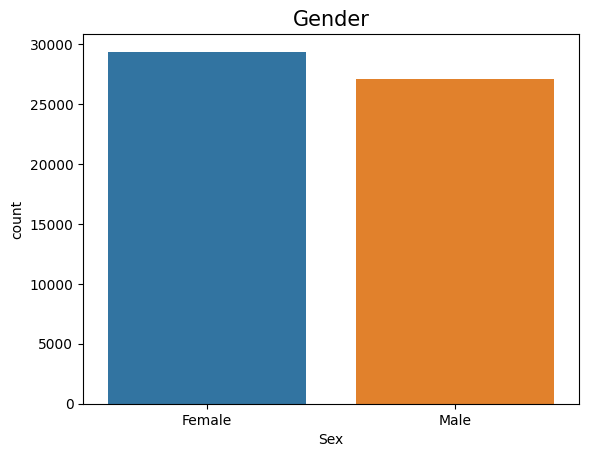

In [ ]:
sns.countplot(x='Sex', data=df_bullying_gender, order=df_bullying_gender['Sex'].value_counts().index)
plt.title('Gender', fontsize=15)


Text(0, 0.5, 'total_Bullying_times')

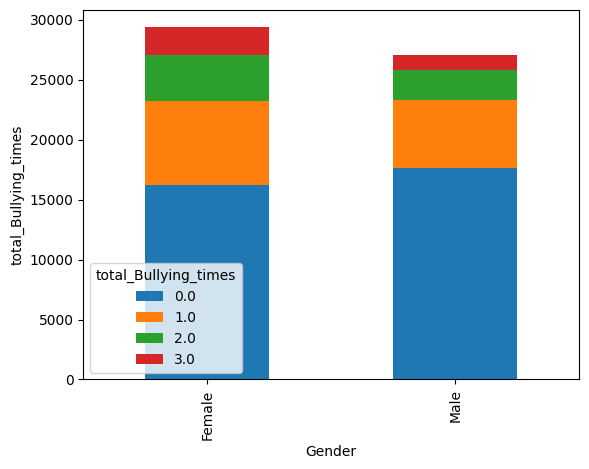

In [ ]:
#female suffer alot from bullying
cross_tab = pd.crosstab(df_bullying_gender['Sex'], df_bullying_gender['total_Bullying_times'])
 
stacked_bar = cross_tab.plot(kind='bar', stacked=True)
stacked_bar.set_xlabel('Gender')
stacked_bar.set_ylabel('total_Bullying_times')

Sex
Female    13137
Male       9440
Name: total_Bullying_times, dtype: int64


(-1.0999984506361418,
 1.099990934134141,
 -1.0999999009401062,
 1.0999999952828623)

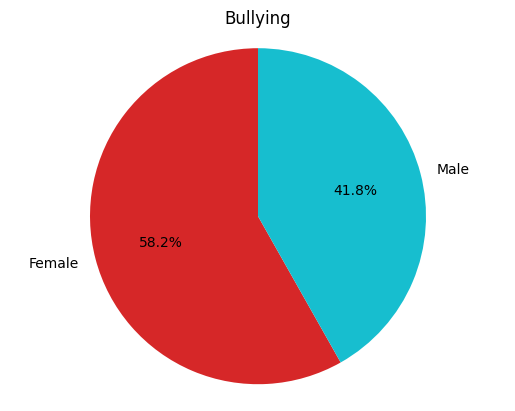

In [ ]:
data = df_bullying_gender.loc[df_bullying_gender["total_Bullying_times"] != 0]

result = data.groupby('Sex')['total_Bullying_times'].count()
print(result)

labels= ['Female', 'Male']

colors=['#d62728', '#17becf']

sizes= [(result[0]/data["total_Bullying_times"].count()), (result[1]/data["total_Bullying_times"].count())]

plt.pie(sizes,labels=labels, colors=colors, startangle=90,explode=(0.0, 0.0), autopct='%1.1f%%')

plt.title('Bullying')

plt.axis('equal')




(-1.0999985009235513,
 1.0999912336186022,
 -1.0999999967045777,
 1.0999999998430752)

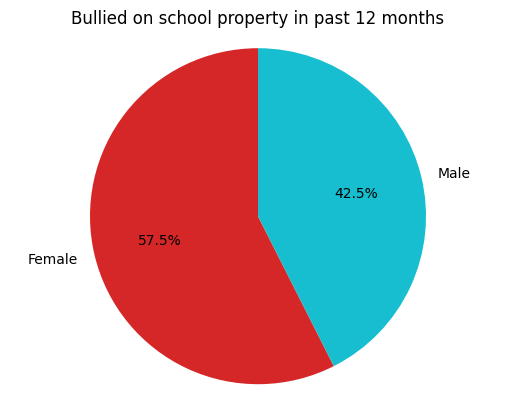

In [ ]:
data = df_bullying_gender.loc[df_bullying_gender["Bullied_on_school_property_in_past_12_months"] != 0]

result = data.groupby('Sex')['Bullied_on_school_property_in_past_12_months'].count()
labels= ['Female', 'Male']

colors=['#d62728', '#17becf']

sizes= [(result[0]/data["Bullied_on_school_property_in_past_12_months"].count()), (result[1]/data["Bullied_on_school_property_in_past_12_months"].count())]

plt.pie(sizes,labels=labels, colors=colors, startangle=90, explode=(0.0, 0.0), autopct='%1.1f%%')

plt.title('Bullied on school property in past 12 months')

plt.axis('equal')



(-1.099998584915561,
 1.0999917293925912,
 -1.0999999982721071,
 1.0999999999177195)

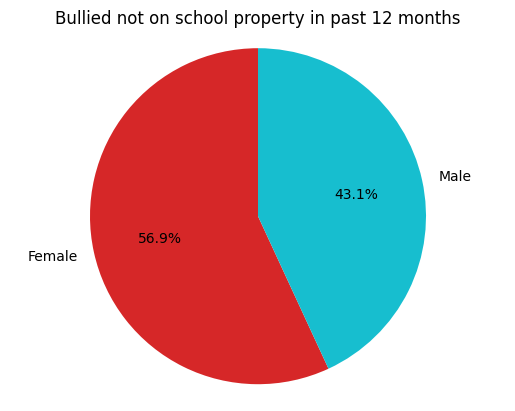

In [ ]:
data = df_bullying_gender.loc[df_bullying_gender["Bullied_not_on_school_property_in_past_12_months"] != 0]

result = data.groupby('Sex')['Bullied_not_on_school_property_in_past_12_months'].count()
labels= ['Female', 'Male']

colors=['#d62728', '#17becf']

sizes= [(result[0]/data["Bullied_not_on_school_property_in_past_12_months"].count()), (result[1]/data["Bullied_not_on_school_property_in_past_12_months"].count())]

plt.pie(sizes,labels=labels, colors=colors, startangle=90, explode=(0.0, 0.0), autopct='%1.1f%%')

plt.title('Bullied not on school property in past 12 months')

plt.axis('equal')








(-1.0999999483219551,
 1.0999996982102442,
 -1.0999997608050884,
 1.099999988609766)

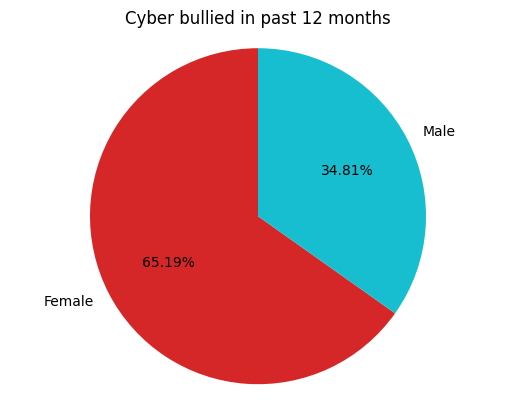

In [ ]:
data = df_bullying_gender.loc[df_bullying_gender["Cyber_bullied_in_past_12_months"] != 0]

result = data.groupby('Sex')['Cyber_bullied_in_past_12_months'].count()


labels= ['Female', 'Male']

colors=['#d62728', '#17becf']

sizes= [(result[0]/data["Cyber_bullied_in_past_12_months"].count()), (result[1]/data["Cyber_bullied_in_past_12_months"].count())]

plt.pie(sizes,labels=labels, colors=colors, startangle=90,explode=(0.0, 0.0), autopct='%1.2f%%')

plt.title('Cyber bullied in past 12 months')

plt.axis('equal')


## Question 10
## Does increasing close friends lower the probability of being lonely?

In [ ]:
df_closeFriend_lonely= df[["Close_friends", "Felt_lonely","Most_of_the_time_or_always_felt_lonely"]]
df_closeFriend_lonely['Bullying']=final_df['Bullying_times']

df_closeFriend_lonely.head()

<ipython-input-298-10cdaaf8452d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_closeFriend_lonely['Bullying']=final_df['Bullying_times']


,Close_friends,Felt_lonely,Most_of_the_time_or_always_felt_lonely,Bullying
0,10,3.0,1.0,2.0
1,0,0.0,0.0,0.0
2,0,0.0,0.0,0.0
3,0,0.0,0.0,0.0
4,0,1.0,0.0,0.0


(array([17931.,     0., 14793.,     0.,     0., 14714.,     0.,  3121.,
            0.,  6422.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

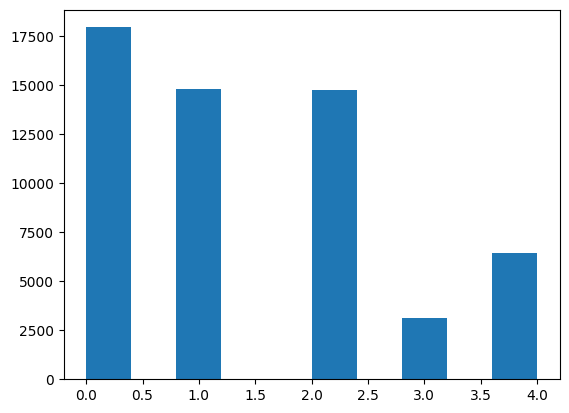

In [ ]:
plt.hist(df_closeFriend_lonely['Felt_lonely']) 

In [ ]:
values= df_closeFriend_lonely['Felt_lonely'].unique()
values

array([3., 0., 1., 2., 4.])

In [ ]:
## make Felt_lonely numerical
df_closeFriend_lonely = df_closeFriend_lonely.replace({'Felt_lonely': {'Never': 0,'Rarely':1,'Sometimes': 2,'Always': 3, 'Most of the time': 4}})
df_closeFriend_lonely.head()

,Close_friends,Felt_lonely,Most_of_the_time_or_always_felt_lonely
0,10,3.0,Yes
1,0,0.0,No
2,0,0.0,No
3,0,0.0,No
4,0,1.0,No


In [ ]:
##make Close_friends numeric


#df_closeFriend_lonely['Close_friends'] = df_closeFriend_lonely['Close_friends'].replace('or', ',', regex=True)
#df_closeFriend_lonely['Close_friends'] = df_closeFriend_lonely['Close_friends'].replace('to', ',', regex=True)
#df_closeFriend_lonely['Close_friends'] = df_closeFriend_lonely['Close_friends'].replace('[a-zA-Z ]+', '', regex=True)
#df_closeFriend_lonely['Close_friends'] = df_closeFriend_lonely['Close_friends'].replace(',[0-9]*', '', regex=True).astype('int64')

df_closeFriend_lonely.head()


,Close_friends,Felt_lonely,Most_of_the_time_or_always_felt_lonely
0,10,3.0,Yes
1,0,0.0,No
2,0,0.0,No
3,0,0.0,No
4,0,1.0,No


In [ ]:
from sklearn.model_selection import train_test_split

features =df_closeFriend_lonely["Close_friends"].to_numpy()

target=df_closeFriend_lonely["Felt_lonely"].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2,shuffle=True)


In [ ]:
from sklearn.linear_model import LinearRegression
import numpy as np


lr = LinearRegression()
lr.fit(X_train.reshape(-1, 1), y_train)
y_pred=lr.predict(X_test.reshape(-1, 1))
y_pred




array([1.36126898, 1.39870936, 1.36126898, ..., 1.36126898, 1.36126898,
       1.36126898])

In [ ]:
import sklearn.metrics as sm
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_pred), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_pred), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_pred), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_pred), 2)) 
print("R2 score =", round(sm.r2_score(y_test, y_pred), 2))

Mean absolute error = 1.08
Mean squared error = 1.66
Median absolute error = 0.64
Explain variance score = 0.01
R2 score = 0.01


In [ ]:
from sklearn import svm

#Create a svm Classifier
clf_linear = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf_linear.fit(X_train.reshape(-1, 1), y_train)

#Predict the response for test dataset
y_pred = clf_linear.predict(X_test.reshape(-1, 1))

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Model Accuracy: how often is the classifier correct?
print("############################################# USING LINEAR KERNEL #####################################################")
print("Accuracy:",accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test, y_pred))
print("classification_report:\n",classification_report(y_test, y_pred))

############################################# USING LINEAR KERNEL #####################################################
Accuracy: 0.315872598052119
Confusion Matrix:
 [[3600    0    0    0    0]
 [2955    0    0    0    0]
 [2895    0    0    0    0]
 [ 646    0    0    0    0]
 [1301    0    0    0    0]]
classification_report:
               precision    recall  f1-score   support

         0.0       0.32      1.00      0.48      3600
         1.0       0.00      0.00      0.00      2955
         2.0       0.00      0.00      0.00      2895
         3.0       0.00      0.00      0.00       646
         4.0       0.00      0.00      0.00      1301

    accuracy                           0.32     11397
   macro avg       0.06      0.20      0.10     11397
weighted avg       0.10      0.32      0.15     11397



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

Forest = RandomForestClassifier().fit(X_train.reshape(-1, 1), y_train)



#Predict the response for test dataset
y_pred = Forest.predict(X_test.reshape(-1, 1))

# Model Accuracy: how often is the classifier correct?
print("############################################# USING Random Forest Classifier #####################################################")
print("Accuracy:",accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test, y_pred))
print("classification_report:\n",classification_report(y_test, y_pred))

############################################# USING Random Forest Classifier #####################################################
Accuracy: 0.3095551460910766
Confusion Matrix:
 [[2767   57  776    0    0]
 [2178   56  721    0    0]
 [2112   78  705    0    0]
 [ 441   14  191    0    0]
 [ 882   47  372    0    0]]
classification_report:
               precision    recall  f1-score   support

         0.0       0.33      0.77      0.46      3600
         1.0       0.22      0.02      0.03      2955
         2.0       0.25      0.24      0.25      2895
         3.0       0.00      0.00      0.00       646
         4.0       0.00      0.00      0.00      1301

    accuracy                           0.31     11397
   macro avg       0.16      0.21      0.15     11397
weighted avg       0.23      0.31      0.22     11397



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

ada = AdaBoostClassifier().fit(X_train.reshape(-1, 1), y_train)



#Predict the response for test dataset
y_pred = ada.predict(X_test.reshape(-1, 1))

# Model Accuracy: how often is the classifier correct?
print("############################################# USING Random Forest Classifier #####################################################")
print("Accuracy:",accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test, y_pred))
print("classification_report:\n",classification_report(y_test, y_pred), "\n\n")




############################################# USING Random Forest Classifier #####################################################
Accuracy: 0.3353066180935033
Confusion Matrix:
 [[1587    0  425    0    0]
 [1262    0  463    0    0]
 [1165    0  622    0    0]
 [ 161    0  159    0    0]
 [ 408    0  336    0    0]]
classification_report:
               precision    recall  f1-score   support

           0       0.35      0.79      0.48      2012
           1       0.00      0.00      0.00      1725
           2       0.31      0.35      0.33      1787
           3       0.00      0.00      0.00       320
           4       0.00      0.00      0.00       744

    accuracy                           0.34      6588
   macro avg       0.13      0.23      0.16      6588
weighted avg       0.19      0.34      0.24      6588
 




/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Example of the Pearson's Correlation test
from scipy.stats import pearsonr
data1 = df_closeFriend_lonely["Close_friends"]
data2 = df_closeFriend_lonely["Felt_lonely"]
stat, p = pearsonr(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
 print('Close_friends independent on Felt_lonely ')
else:
 print('Close_friends dependent on Felt_lonely')

stat=0.061, p=0.000
Close_friends dependent on Felt_lonely
